# CURSO :
Analisis de la informacion de datos en R

# Importar Data

## Carga de Librerias

In [40]:
library(dplyr)
library(readr)
library(readxl)
require(openxlsx)

## Ruta de carpeta

In [41]:
# Se define la informacion de una ruta de carpeta
ruta = 'D:/Dropbox/Docencia/UPN/Estadistica/Software/L1'

# Se cambia la informacion de la ruta con el comando: os.chdir()
setwd(ruta)

## Carga de Datos 

In [42]:
data = read_excel('pbi_anual.xlsx')

## Manipulacion de datos

In [43]:
data %>% head(5)

fecha,pbi
<dbl>,<dbl>
1980,167596
1981,176901
1982,176507
1983,158136
1984,163842


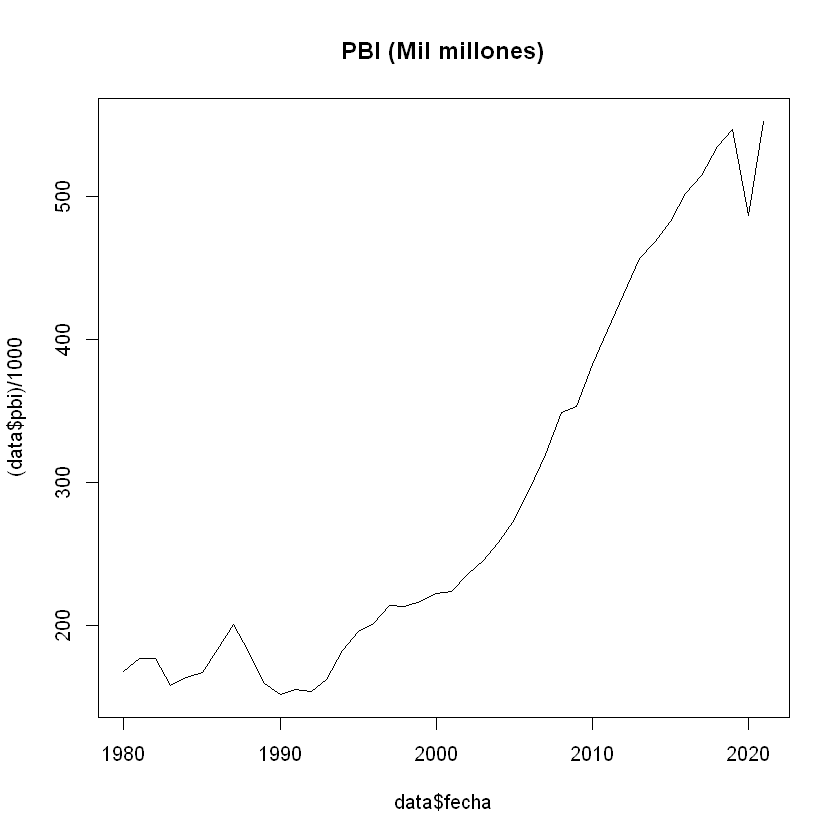

In [44]:
plot(data$fecha, (data$pbi)/1000, type='l', main='PBI (Mil millones)')

In [45]:
# Midiendo la tasa de crecimiento
data <- data %>% mutate(growth= (pbi-lag(pbi))/lag(pbi))
data %>% head()


fecha,pbi,growth
<dbl>,<dbl>,<dbl>
1980,167596,NA
1981,176901,0.055520418
1982,176507,-0.002227234
1983,158136,-0.104080858
1984,163842,0.036082865
1985,167219,0.020611321


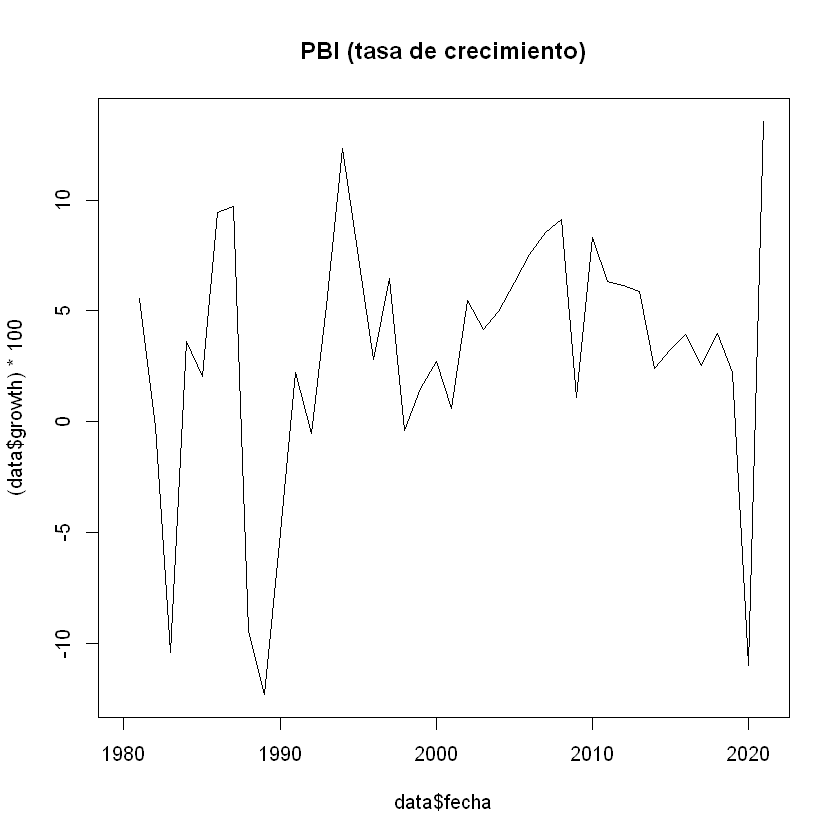

In [46]:
plot(data$fecha, (data$growth)*100, type='l', main='PBI (tasa de crecimiento)')

## Analisis descriptivo general

In [47]:
summary(data)

     fecha           pbi             growth        
 Min.   :1980   Min.   :151492   Min.   :-0.12312  
 1st Qu.:1990   1st Qu.:178131   1st Qu.: 0.01495  
 Median :2000   Median :222893   Median : 0.03953  
 Mean   :2000   Mean   :288480   Mean   : 0.03121  
 3rd Qu.:2011   3rd Qu.:400212   3rd Qu.: 0.06327  
 Max.   :2021   Max.   :552312   Max.   : 0.13551  
                                 NA's   :1         

# Medicicion de la Brechas Producto

## Uso de librerias 

In [48]:
install.packages("mFilter")
library(mFilter)

Warning message:
"package 'mFilter' is in use and will not be installed"


In [49]:
#?mFilter
# Transformamos en series de tiempo la data de PBI
pbi_a <- ts(data$pbi, frequency = 1, start = c(1980,1))
pbi_a

A Time Series:
 [1] 167596.0 176901.0 176507.0 158136.0 163842.0 167219.0 182981.0 200778.0
 [9] 181822.0 159436.0 151492.0 154854.0 154017.0 162093.0 182043.7 195536.0
[17] 201009.3 214028.3 213190.0 216376.7 222206.7 223579.6 235772.9 245592.6
[25] 257769.8 273971.2 294597.8 319693.0 348870.0 352693.0 382081.0 406256.0
[33] 431199.0 456435.0 467308.0 482506.0 501581.0 514215.0 534665.0 546605.0
[41] 486402.1 552312.2

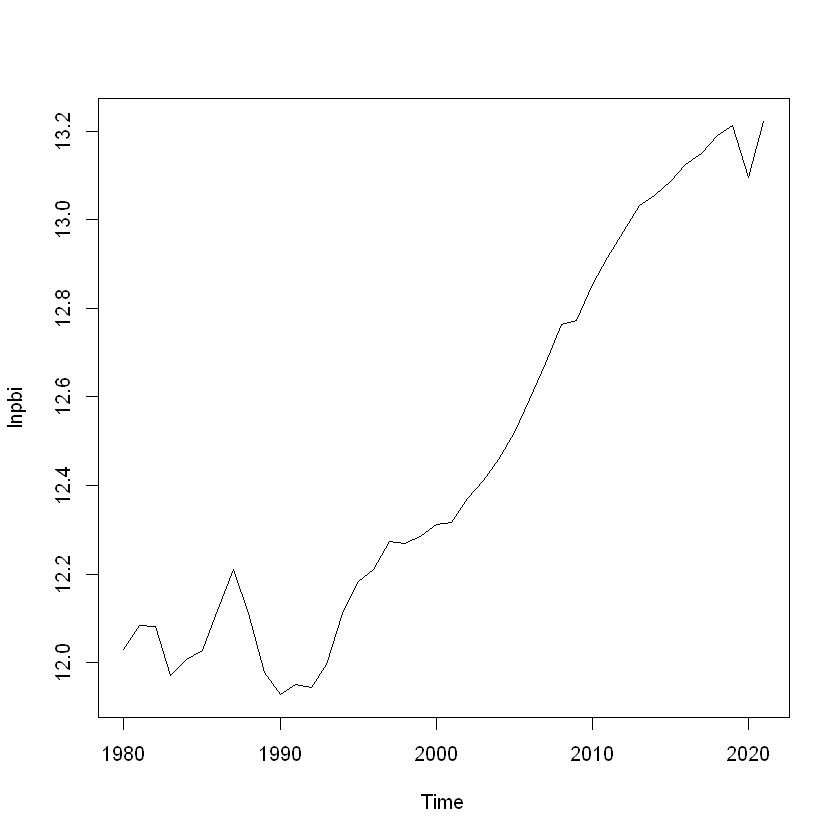

In [50]:
lnpbi <- log(pbi_a)
plot(lnpbi)

## Aplicacion del filtro HP

In [51]:
lnpbi_hp <- mFilter(lnpbi, filter="HP")
#unemp.hp <- mFilter(unemp,filter="HP")
summary(lnpbi_hp)


Title:
 Hodrick-Prescott Filter 

Call:
 hpfilter(x = x, freq = ag$freq, type = ag$type, drift = ag$drift)

Method:
 hpfilter

Filter Type:
 lambda

Series:
 lnpbi

Descriptive Statistics:
 
     lnpbi           Trend           Cycle          
 Min.   :11.93   Min.   :11.98   Min.   :-0.086197  
 1st Qu.:12.09   1st Qu.:12.06   1st Qu.:-0.020478  
 Median :12.31   Median :12.33   Median :-0.002156  
 Mean   :12.47   Mean   :12.47   Mean   : 0.000000  
 3rd Qu.:12.90   3rd Qu.:12.90   3rd Qu.: 0.024792  
 Max.   :13.22   Max.   :13.19   Max.   : 0.127514  

In-sample error measures:
        ME        MSE        MAE        MPE       MAPE 
-5.778e-19  1.360e-03  2.655e-02 -1.322e-05  2.156e-03 



## Extrayendo la tendencia

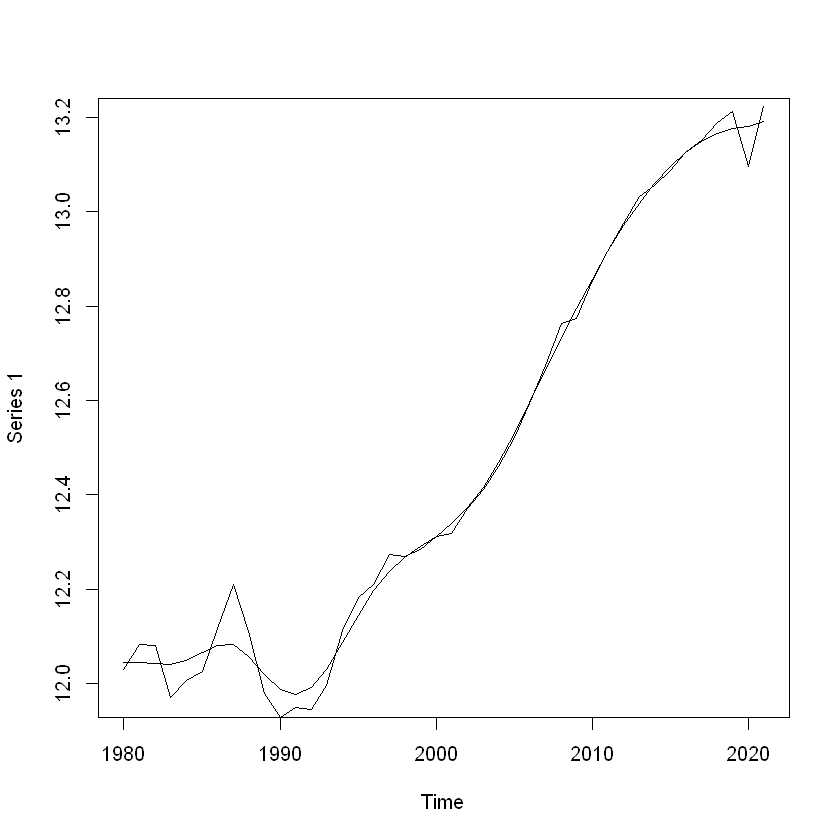

In [52]:
lnpbitend <- lnpbi_hp$trend
plot(lnpbitend)
lines(lnpbi)

## Calculo de la Brecha Producto

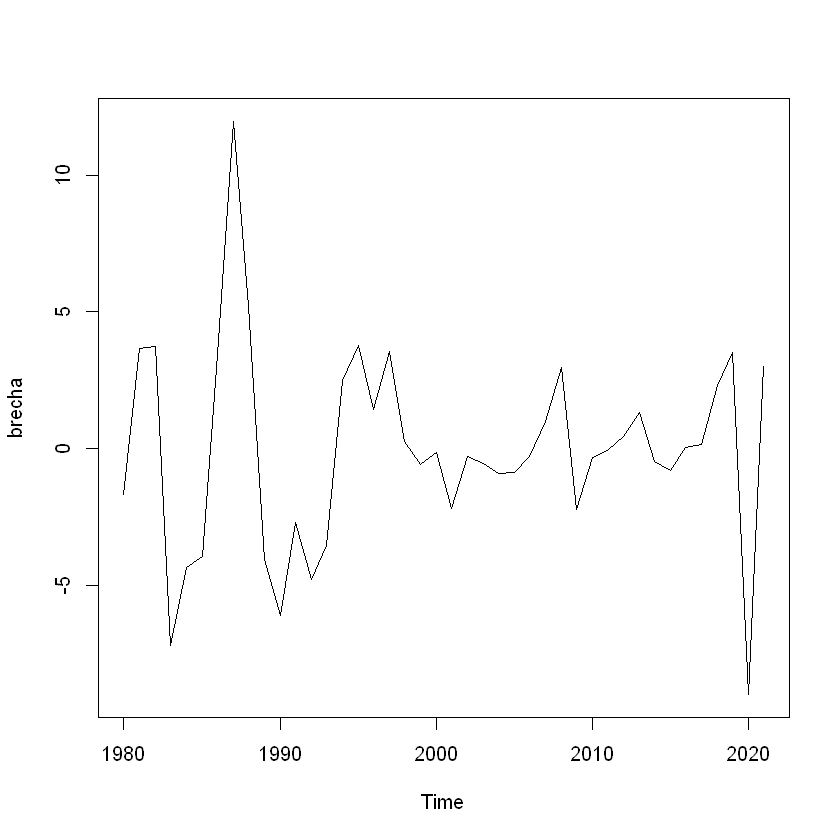

In [53]:
brecha <- exp(lnpbi) - exp(lnpbitend)
brecha_part <- (brecha / (pbi_a) )*100
plot(brecha_part)

In [54]:
# Se agrega el calculo de la brecha a la data original
data$brecha <- as.numeric(brecha_part)

summary(data)

data %>% str()
data %>% head()


     fecha           pbi             growth             brecha        
 Min.   :1980   Min.   :151492   Min.   :-0.12312   Min.   :-9.00208  
 1st Qu.:1990   1st Qu.:178131   1st Qu.: 0.01495   1st Qu.:-2.06919  
 Median :2000   Median :222893   Median : 0.03953   Median :-0.21585  
 Mean   :2000   Mean   :288480   Mean   : 0.03121   Mean   :-0.06762  
 3rd Qu.:2011   3rd Qu.:400212   3rd Qu.: 0.06327   3rd Qu.: 2.44867  
 Max.   :2021   Max.   :552312   Max.   : 0.13551   Max.   :11.97186  
                                 NA's   :1                            

tibble [42 x 4] (S3: tbl_df/tbl/data.frame)
 $ fecha : num [1:42] 1980 1981 1982 1983 1984 ...
 $ pbi   : num [1:42] 167596 176901 176507 158136 163842 ...
 $ growth: num [1:42] NA 0.05552 -0.00223 -0.10408 0.03608 ...
 $ brecha: num [1:42] -1.69 3.66 3.72 -7.22 -4.33 ...


fecha,pbi,growth,brecha
<dbl>,<dbl>,<dbl>,<dbl>
1980,167596,NA,-1.691328
1981,176901,0.055520418,3.663980
1982,176507,-0.002227234,3.724788
1983,158136,-0.104080858,-7.220298
1984,163842,0.036082865,-4.333374
1985,167219,0.020611321,-3.944691


In [55]:
# Calculo de rango de fechas
data$periodo <- ifelse(data$fecha<=1990,"1980-1990",ifelse(data$fecha>1990 & data$fecha<=2000, "1991-2000",ifelse(data$fecha>2000 & data$fecha<=2010, "2001-2010","2011-2019")))
table(data$periodo)


1980-1990 1991-2000 2001-2010 2011-2019 
       11        10        10        11 

In [56]:
# Estadisticas descriptivas por grupo
Tabla_brecha <- data %>% group_by(periodo) %>% summarise(Promedio = mean(brecha))
Tabla_brecha

periodo,Promedio
<chr>,<dbl>
1980-1990,0.05986490
1991-2000,-0.02678439
2001-2010,-0.36728693
2011-2019,0.04018704
